In [ ]:
# @title Creating XGBoost Model

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Assuming X is your feature matrix and y is the target variable (oil prices)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
XGBoost_model = xgb.XGBRegressor(objective ='reg:squarederror')
XGBoost_model.fit(X_train, y_train)

# Make predictions and evaluate the model
xg_y_pred = XGBoost_model.predict(X_valid)


# For future predictions, you can use:
#future_predictions = XGBoost_model.predict(X_future)

# Calculate and print the Mean Absolute Error of dt
mae_xg = mean_absolute_error(y_valid, xg_y_pred)
mse_xg = mean_squared_error(y_valid, xg_y_pred)
r2_xg = r2_score(y_valid, xg_y_pred)

# print xg info
print(f'Mean Absolute Error for xg: {mae_xg}')
print(f"Mean Squared Error for xg: {mse_xg}")
print(f"R-squared for xg: {r2_xg}")

# print rf info
print(f"Mean Absolute Error for rf: {mae_rf}")
print(f"Mean Squared Error for rf: {mse_rf}")
print(f"R-squared for rf: {r2_rf}")
#print(y_pred)





Mean Absolute Error for xg: 1.5140623333606835
Mean Squared Error for xg: 6.072054300203856
R-squared for xg: 0.958301497105151
Mean Absolute Error for rf: 1.6207909540815262
Mean Squared Error for rf: 6.420734671801863
R-squared for rf: 0.9559070110275202


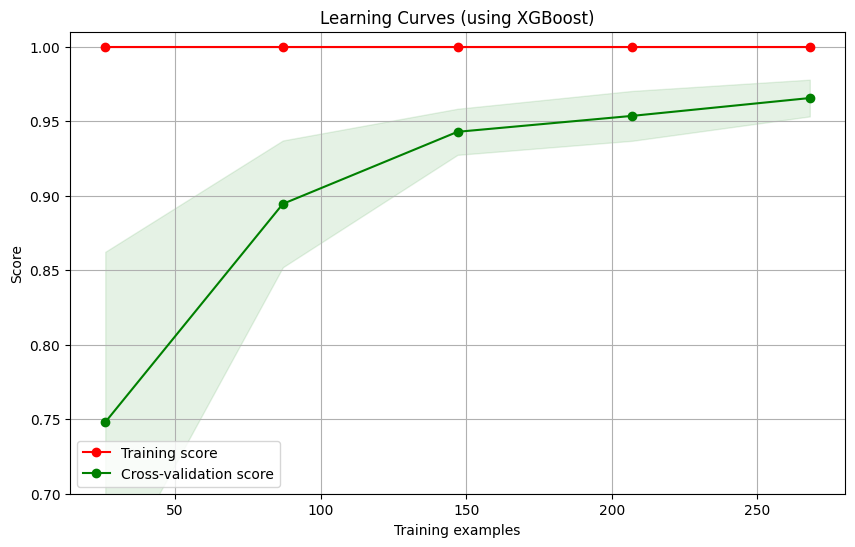

In [ ]:
title = "Learning Curves (using XGBoost)"
cv = 10  # Number of folds for cross-validation
estimator = XGBoost_model  # replace with your model, for example, RandomForestRegressor()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Define the model with regularization
XGBoost_model_tuned = xgb.XGBRegressor(
    alpha=3, # L1 regularization term on weights (analogous to Lasso regression)
    reg_lambda=3, # L2 regularization term on weights (analogous to Ridge regression)
    max_depth=2, # Maximum depth of a tree
    random_state=42
)

# Train and evaluate
cross_val_score(XGBoost_model_tuned, X_train, y_train, cv=5)


array([0.96751401, 0.97421263, 0.96372382, 0.95166892, 0.97116999])

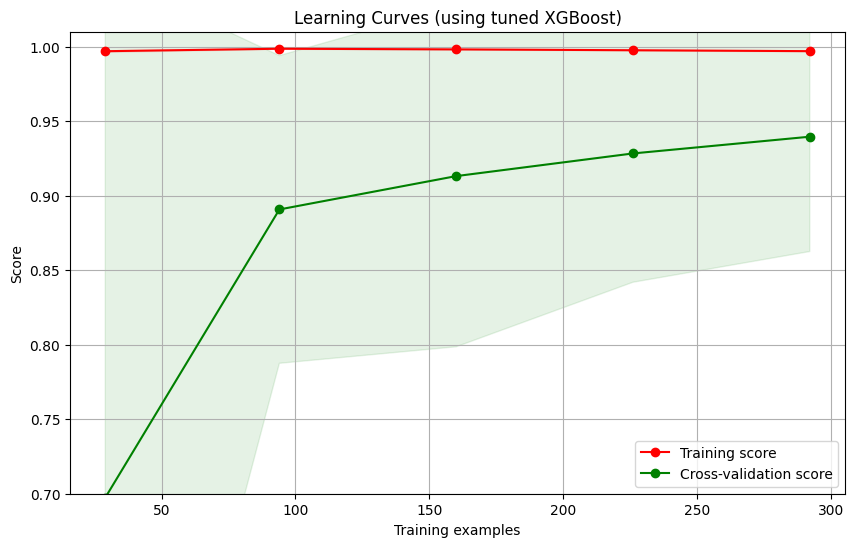

In [ ]:
title = "Learning Curves (using tuned XGBoost)"
cv = 50  # Number of folds for cross-validation
estimator = XGBoost_model_tuned  # replace with your model, for example, RandomForestRegressor()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()


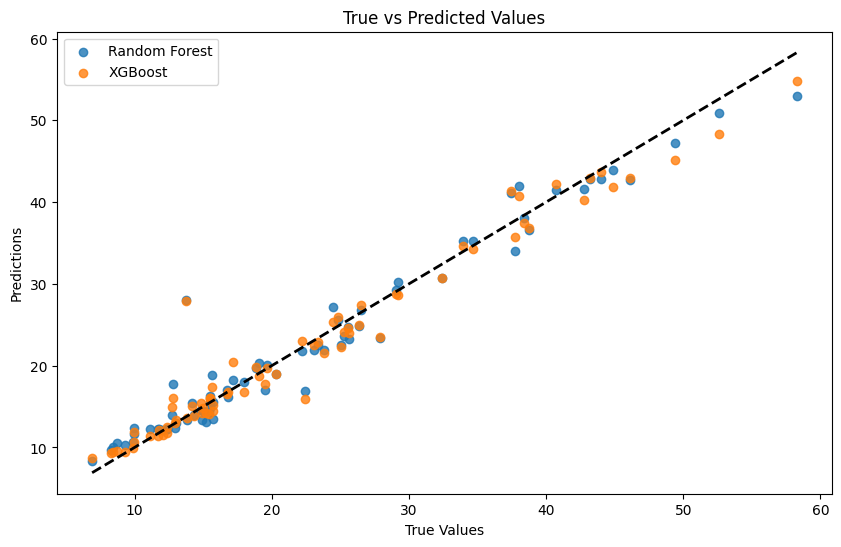

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(y_test, y_pred, alpha=0.8, label='Random Forest')
plt.scatter(y_test, xg_y_pred, alpha=0.8, label='XGBoost')

plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.title('True vs Predicted Values')
plt.legend()

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)

plt.show()

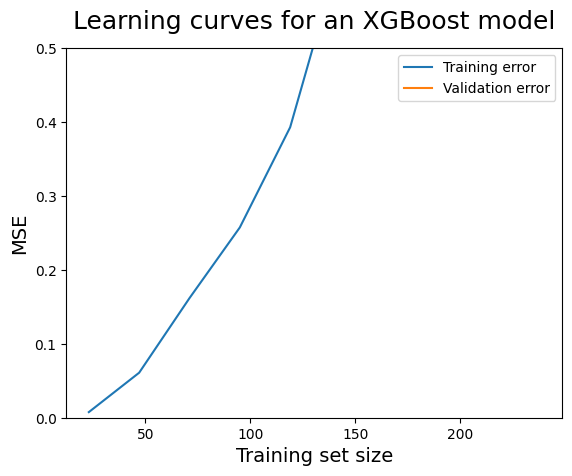

In [ ]:
import xgboost as xgb
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the model with adjusted parameters
XGBoost_model_tuned  = xgb.XGBRegressor(
    alpha=0.2,
    reg_lambda=0.2,
    learning_rate=0.1,
    max_depth=2,
    random_state=42,
    n_estimators=90
)

# Fit model
XGBoost_model_tuned .fit(X_train, y_train)

# Extract learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    XGBoost_model_tuned , X_train, y_train, cv=5, scoring='neg_mean_squared_error', 
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = -np.mean(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, valid_scores_mean, label='Validation error')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for an XGBoost model', fontsize=18, y=1.03)
plt.legend()
plt.ylim(0,.5)
plt.show()


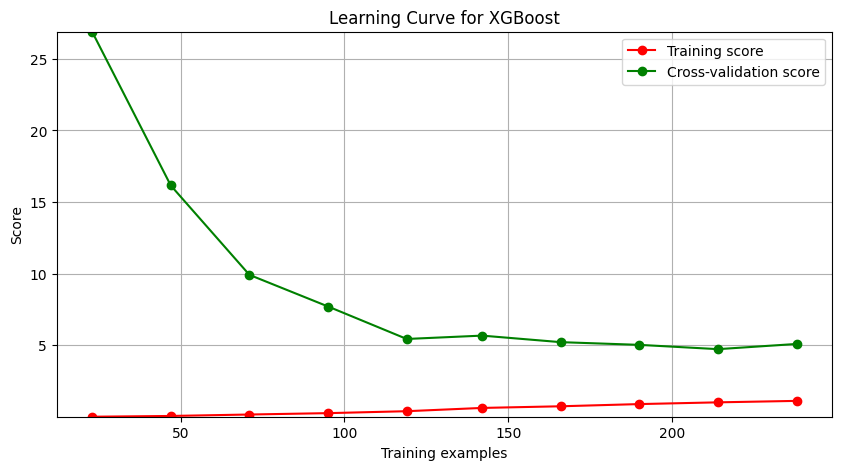

Training scores: [0.00757955 0.0608894  0.16180479 0.2574136  0.39291893 0.62133096
 0.73693478 0.89013242 1.01181411 1.11371441]
Validation scores: [26.89270343 16.15497086  9.91387548  7.70367373  5.43753959  5.67152296
  5.21472169  5.02573532  4.72580327  5.08959023]


In [ ]:
plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve for XGBoost")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)

# Dynamically adjust y-limits
plt.ylim(min(min(train_scores_mean), min(valid_scores_mean)), max(max(train_scores_mean), max(valid_scores_mean)))

plt.show()

print("Training scores:", train_scores_mean)
print("Validation scores:", valid_scores_mean)
